# 源代码-相对强度RPS择时策略

In [ ]:
from tick_trade_api import TradeAPI
# 输入指定账户
trade_api=TradeAPI('79855040',order_policy=MarketPolicy)

In [1]:
source_code1 = """

# 源代码-相对强度RPS择时策略
import pandas as pd
#初始化账户       
def init(context):      
    # 设置要交易的股票      
    context.security = '000300.SH'   
    # 相对强度RPS系数
    context.N = 60
    context.M = 5
#设置买卖条件，每个交易频率（日/分钟/tick）调用一次   
def handle_bar(context,bar_dict):
    # 获取收盘价价格
    data = history(context.security, ['close'], context.N, '1d')
    # 计算相对强度RPS
    rps = (data['close'] - data['close'].rolling(context.N,min_periods=0).min()) / (data['close'].rolling(context.N,min_periods=0).max() - data['close'].rolling(context.N,min_periods=0).min())
    # 计算相对强度RPS均值
    rps_10 = pd.rolling_mean(rps,context.M)
    # 持股市值
    value = context.portfolio.stock_account.market_value
    # 若均值为正，则买入或持仓
    if rps_10.values[-1] >=0.9 and value==0:
        # 买入
        order_target_percent(context.security,1)
        # 打印
        print('当前RPS值{},买入{}'.format(rps_10.values[-1],context.security))
    # 若均值为负，则卖出或空仓
    if rps_10.values[-1] <= 0.5 and value>0:
        # 卖出
        order_target(context.security,0)
        # 打印
        print('当前RPS值{},卖出{}'.format(rps_10.values[-1],context.security))
        
"""

# 系统重置
try:
    import shutil
    shutil.rmtree('persist/研究环境策略')
except:
    pass


2020-01-02 09:31:00.000000 - INFO - 当前RPS值0.9188134885444971,买入000300.SH
2020-02-05 09:31:00.000000 - INFO - 当前RPS值0.4449229165980867,卖出000300.SH
2020-06-09 09:31:00.000000 - INFO - 当前RPS值0.9319291958152522,买入000300.SH
2020-09-28 09:31:00.000000 - INFO - 当前RPS值0.33661484305234735,卖出000300.SH
2020-10-19 09:31:00.000000 - INFO - 当前RPS值0.9046559736100674,买入000300.SH
2021-03-09 09:31:00.000000 - INFO - 当前RPS值0.4307253135014336,卖出000300.SH
2021-06-02 09:31:00.000000 - INFO - 当前RPS值0.9884397139014192,买入000300.SH
2021-06-22 09:31:00.000000 - INFO - 当前RPS值0.43823140425427454,卖出000300.SH
2021-12-15 09:31:00.000000 - INFO - 当前RPS值0.9578976841515985,买入000300.SH
2021-12-23 09:31:00.000000 - INFO - 当前RPS值0.4509442351558205,卖出000300.SH


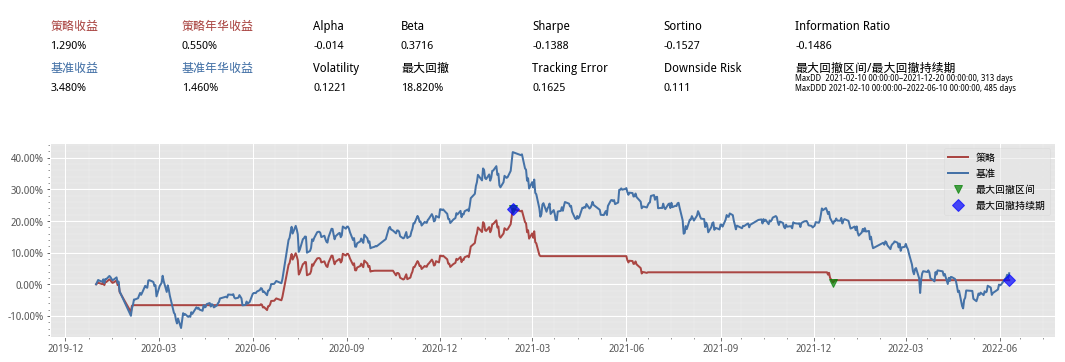

{'analyser': {'benchmark_portfolio':                 close  unit_net_value
  2019-12-31  4096.5821        1.000000
  2020-01-02  4152.2408        1.013587
  2020-01-03  4144.9649        1.011811
  2020-01-06  4129.2954        1.007986
  2020-01-07  4160.2274        1.015536
  2020-01-08  4112.3172        1.003841
  2020-01-09  4164.3697        1.016547
  2020-01-10  4163.1849        1.016258
  2020-01-13  4203.9883        1.026218
  2020-01-14  4189.8862        1.022776
  2020-01-15  4166.7344        1.017125
  2020-01-16  4149.0434        1.012806
  2020-01-17  4154.8530        1.014224
  2020-01-20  4185.8304        1.021786
  2020-01-21  4114.3085        1.004327
  2020-01-22  4131.9311        1.008629
  2020-01-23  4003.9013        0.977376
  2020-02-03  3688.3578        0.900350
  2020-02-04  3785.6376        0.924097
  2020-02-05  3828.5272        0.934566
  2020-02-06  3899.7751        0.951958
  2020-02-07  3899.8693        0.951981
  2020-02-10  3916.0052        0.955920
  202

In [5]:
# 模拟运行
#rtrade = research_trade('研究环境策略', source_code1, capital_base=float(50000), frequency='MINUTE', trade_api=trade_api)#trade_api可传入List[TradeAPI]，实现多账户交易


# 回测运行
#research_strategy(source_code, start_date=None, end_date=None, capital_base=1000000, frequency='DAILY', stock_market='STOCK', benchmark=None)

#research_strategy(source_code1, start_date='20180901', end_date='20220607', capital_base=float(500000), frequency='MINUTE', stock_market='STOCK', benchmark=None)

research_strategy(source_code1, start_date='20200101', end_date='20220610', capital_base=float(500000), frequency='DAILY', stock_market='STOCK', benchmark=None)


## 时间序列：移动窗口函数（rolling，expanding）

为了处理数字数据，Pandas提供了几个变体，如滚动，展开和指数移动窗口统计的权重。 其中包括总和，均值，中位数，方差，协方差，相关性等；
所谓窗口，就是将某个点的取值扩大到包含这个点的一段区间，用区间来进行判断；
移动窗口就是窗口向一端滑行，默认是从右往左，每次滑行并不是区间整块的滑行，而是一个单位一个单位的滑行；
窗口函数主要用于通过平滑曲线来以图形方式查找数据内的趋势。如果日常数据中有很多变化，并且有很多数据点可用，那么采样和绘图就是一种方法，应用窗口计算并在结果上绘制图形是另一种方法。 通过这些方法，可以平滑曲线或趋势。

统计和其他通过移动窗口或指数衰减而运行的函数是用于时间序列操作的数组变换的一个重要类别。这对平滑噪声或粗糙的数据非常有用。称这些函数为移动窗口函数，它包含了一些没有固定长度窗口的函数，比如指数加权移动平均。与其他的统计函数类似，这些函数会自动排除缺失数据。
然后就是rolling 算子，它的行为于resample and groupby类似。可以在series or dataframe 上通过一个window（以一个区间的数字来表示）进行调用。

In [ ]:
# close_px_all = pd.read_csv('stock_px_2.csv',sep='\t',parse_dates=True,index_col=0)
# close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
# close_px = close_px.resample('B').ffill()   # 先载入一些数据序列数据并按照工作日的频率进行重新采样。



In [ ]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]
2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


这个就是苹果股价及250日的MA（移动平均线，，就是把某段时间的股价加以平均，再依据这个平均值作出平均线图像）

rolling(250) 与groupby 的行为类似，但是他创建的对象是根据250 日滑动窗口分组而不是直接分组（啊。。这。。）。因此这里是股票价格的250日移动窗口平均值。

默认情况下，滚动函数需要窗口中所有的值都是非NA值，由于存在缺失值这种行为会发生改变，尤其是时间序列的起始位置你有用的数据是少于窗口区间的。


DataFrame.rolling(window, min_periods=None, freq=None, center=False, win_type=None, on=None, axis=0, closed=None)

感觉整个人都傻了。。。。脑补链接 我语文不好，表达不清，看不懂的还是去看原来的文章吧。。。。

window：表示时间窗的大小，通常为int(也可以是offset），数值表示计算统计量的观测值的数量即向前几个数据。就像上面那个rolling(250).mean() 产生的数据，就是原数据250个数据的平均值，所以前249个都是NAN（向前扩展嘛），

min_periods：最少需要有值的观测点的数量，对于int类型，默认与window相等。若调整，则一般小于window值。那个rolling(250, min_periods=10)现在最小的组是10，也就是对于那些nan，如果源数据有10个，就可以。。。所以现在只有9个nan.

freq：从0.18版本中已经被舍弃。

center：是否使用window的中间值作为label，默认为false。只能在window是int时使用。感觉就是向前推进一个，最后一个是nan。

win_type：默认为None，一般不特殊指定

on：对于多列FrameData，用on来指定使用哪列（举例data.test，已经指定了）

closed：定义区间的开闭，即默认为right

axis：0–行，1—列

为了计算扩展窗口的均值，使用expanding算子，而不是rolling 。扩展均值从时间序列的起始位置开始时间窗口，并增加窗口的大小，直到涵盖整个序列，

expanding()函数的参数，与rolling()函数的参数用法相同；

DataFrame.expanding(min_periods = 1，center = False，axis = 0)

就是rolling 的阉割版。。。只设置最小的观测值数量，类似cumsum()函数的累计求和，其优势在于还可以进行更多的聚类计算

expanding_mean = appl_std250.expanding().mean()      
#### apple_std250 的扩展均值窗口

在dataframe上调用一个移动窗口函数会将变换应用到每一行上。这个股票60日MA( Y 轴去对数）


rolling 函数也接受表示固定大小的时间偏置字符串，而不只是一个区间的集合数字。对不规则时间序列使用注释非常有用。这些字符串可以传递给resample。例如我们可以像这样计算20天的滚动平均值。

In [ ]:
close_px.rolling('20D').mean()
AAPL	MSFT	XOM
2003-01-02	7.400000	21.110000	29.220000
2003-01-03	7.425000	21.125000	29.230000
2003-01-06	7.433333	21.256667	29.473333
2003-01-07	7.432500	21.425000	29.342500
2003-01-08	7.402000	21.402000	29.240000
...	...	...	...
2011-10-10	389.351429	25.602143	72.527857
2011-10-11	388.505000	25.674286	72.835000
2011-10-12	388.531429	25.810000	73.400714
2011-10-13	388.826429	25.961429	73.905000
2011-10-14	391.038000	26.048667	74.185333
2292 rows × 3 columns


指定一个常数衰减因子以向更多近期观测值提供更多权重，可以替代使用具有相等加权观测值的静态窗口尺寸的方法。有多种方式可以指定衰减因子。例如span(跨度），这使得结果与窗口大小等于跨度的简单移动窗口函数。

由于指数加权统计值给更近期的观测值以更多的权重，与等权重的版本相比，他对变化适应的更快。（说人话好吗。。）

pandas拥有ewm ，通rolling expanding 一起使用。。
————————————————
版权声明：本文为CSDN博主「AI路漫漫」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/weixin_46192930/article/details/107401366

为了提升数据的准确性，将某个点的取值扩大到包含这个点的一段区间，用区间来进行判断，这个区间就是窗口。移动窗口就是窗口向一端滑行，默认是从右往左，每次滑行并不是区间整块的滑行，而是一个单位一个单位的滑行。上面的例子可以看出，前两个值都是非NAN值，计数为2，第三个值为空，所以加上第三个单位后计数仍未2，依次类推…

首先我们设置的窗口window=5，也就是5个数取一个和。index 0,1 ,2,3为NaN，是因为它们前面都不够5个数。等到index4 的时候，它的值是怎么算的呢，index4 = index0+index1+index2+index3+index4
3. rolling.mean():计算移动窗口的均值
4. rolling.median():计算移动窗口的中位数
5. rolling.var()：移动窗口的方差
6. rolling.corr:移动窗口的相关系数
还有方差var,标准差std,协方差cov,最大值max,最小值min等的函数应用方法同上

In [7]:
import pandas as pd
import numpy as np
s = pd.Series([2, 3, 4, 10,3,4,6,9])
s1 = s.rolling(5).sum()
# print(s1)
# s1 = s.rolling(5).count()
# print(s1)
# s1 = s.rolling(5).max()
# print(s1)
# s1 = s.rolling(5).min()
# print(s1)
# s1 = s.rolling(5).mean()
# print(s1)
s1 = s.rolling(5).cov()
print(s1)
s1 = s.rolling(5).var()
print(s1)
s1 = s.rolling(5).std()
print(s1)
s1 = s.rolling(5).median()
print(s1)

0     NaN
1     NaN
2     NaN
3     NaN
4    10.3
5     8.7
6     7.8
7     9.3
dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4    10.3
5     8.7
6     7.8
7     9.3
dtype: float64
0         NaN
1         NaN
2         NaN
3         NaN
4    3.209361
5    2.949576
6    2.792848
7    3.049590
dtype: float64
0    NaN
1    NaN
2    NaN
3    NaN
4    3.0
5    4.0
6    4.0
7    6.0
dtype: float64
